In [ ]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import sys
from IPython.display import display, HTML
from typing import List
import numpy as np
import matplotlib
import imodelsx.util
from copy import deepcopy
import re
import notebook_helper
import mprompt.viz
import scipy.special
from pprint import pprint
import joblib
import viz
from mprompt.config import RESULTS_DIR


# EXPT_NAME = 'relationships_mar9'
# EXPT_NAME = 'huth2016clusters_mar21_i_time_traveled'
EXPT_NAME = 'voxels_mar21_hands_arms_emergency'
EXPT_DIR = join(RESULTS_DIR, 'stories', EXPT_NAME)
rows = joblib.load(join(EXPT_DIR, f'rows.pkl'))
expls = rows.expl.values
paragraphs = rows.paragraph.values
prompts = rows.prompt.values
# voxel_nums = rows.module_num.values
# subjects = rows.subject.values

### Heatmaps

**Explanation** <> Story Heatmap

In [ ]:
scores_data = joblib.load(join(EXPT_DIR, f'scores_data.pkl'))
s = scores_data['scores_mean'].T
# s = scipy.special.softmax(s, axis=1)
# s = (s - s.min()) / (s.max() - s.min())
mprompt.viz.heatmap(s, expls, ylab='Story', xlab='Explanation')
plt.savefig(join(RESULTS_DIR, 'stories', f'{EXPT_NAME}_story_data_match.png'), dpi=300)
plt.savefig(join(RESULTS_DIR, 'stories', f'{EXPT_NAME}_story_data_match.pdf'), bbox_inches='tight')
# plt.tight_layout()

**Module** <> Story Heatmap

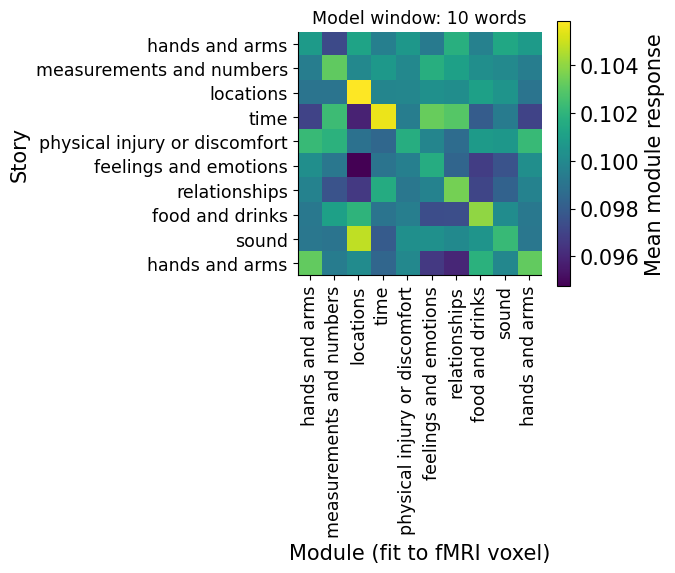

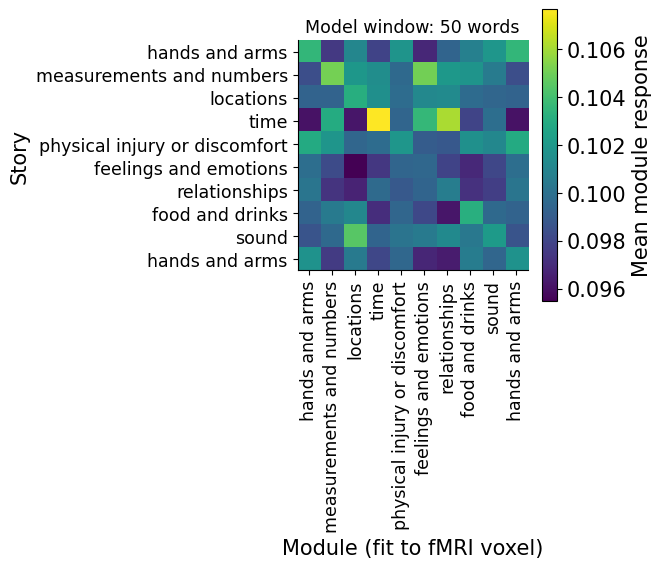

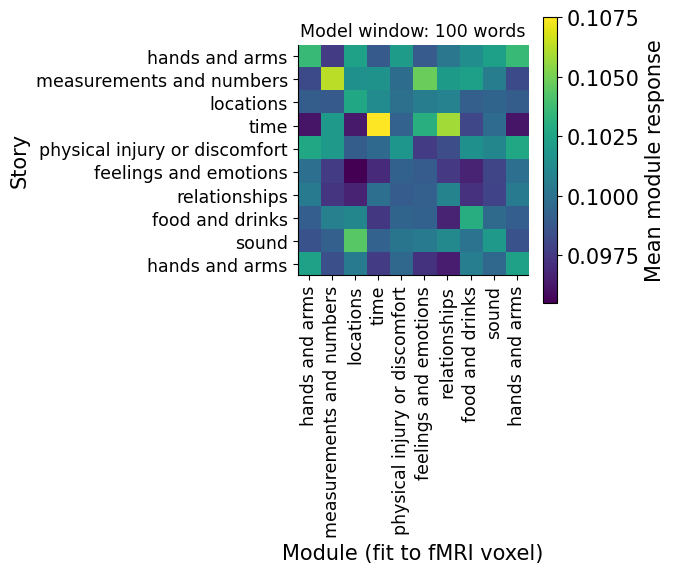

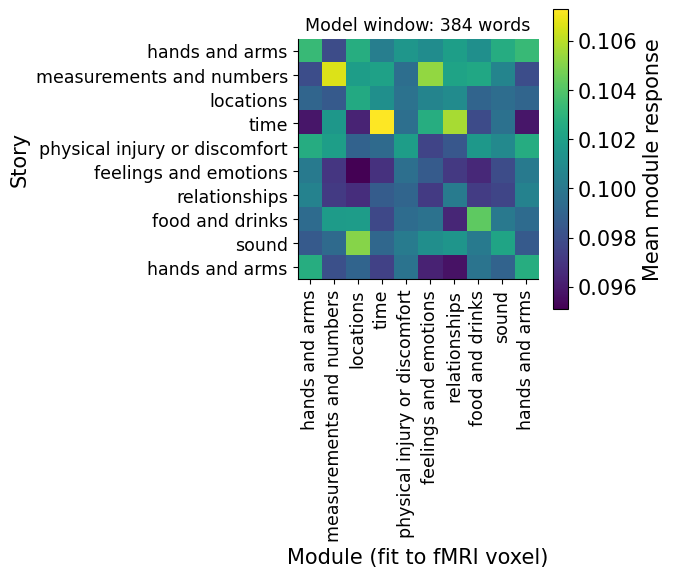

In [6]:
# keys: scores_mod, scores_max_mod, all_scores, all_ngrams
ngram_lengths = [10, 50, 100, 384]
for ngram_length in ngram_lengths:
    scores_mod_dict = joblib.load(join(EXPT_DIR, f'scores_mod_ngram_length={ngram_length}.pkl'))

    s = scores_mod_dict['scores_mean'].T
    s = scipy.special.softmax(s, axis=0)
    # s = (s - s.min()) / (s.max() - s.min())
    mprompt.viz.heatmap(s, expls, ylab='Story', xlab='Module (fit to fMRI voxel)', clab='Mean module response')
    plt.title(f'Model window: {ngram_length} words', fontsize='small')
    plt.savefig(join(EXPT_DIR, f'{EXPT_NAME}_story_mod_match_ngram_length={ngram_length}.png'), dpi=300)
    plt.savefig(join(EXPT_DIR, f'{EXPT_NAME}_story_mod_match_ngram_length={ngram_length}.png'), bbox_inches='tight')
    plt.show()

### Story visualization

**Explanation** <> Story match

In [ ]:
scores_data_story = joblib.load(join(EXPT_DIR, f'scores_data_story.pkl'))
s_data = notebook_helper.viz_paragraphs(
    paragraphs, scores_data_story, expls, prompts,
    normalize_to_range=True, moving_average=True, shift_to_range=True)
display(HTML(s_data))

**Module** <> Story Match

In [ ]:
s_mod = ''
scores_mod_story = [scores_mod_dict['scores_all'][i][i] for i in range(len(scores_mod_dict['scores_all']))]
for i in range(len(paragraphs)):
    scores_i = scores_mod_story[i]

    # normalize to 0-1 range
    scores_i = (scores_i - scores_i.min()) / (scores_i.max() - scores_i.min())
    # scores_mod_i = scipy.special.softmax(scores_mod_i)
    # scores_i = mprompt.viz.moving_average(scores_i, n=3)
    scores_i = scores_i / 2 + 0.5 # shift to 0.5-1 range
    s_mod += ' ' + mprompt.viz.colorize(paragraphs[i].split(), scores_i, title=expls[i], subtitle=prompts[i])
# display(HTML(s_mod))

In [ ]:
template_style = '''<style type="text/css">
#wrap {
   width:100%;
   margin:0 auto;
}
#left_col {
   float:left;
   width:48%;
}
#right_col {
   float:right;
   width:48%;
}
# body {
#     background-color:#b0c4de;
# }
</style>
'''

template = '''
<body>
    <div id="wrap">
        <div id="left_col">
            {col_left}
        </div>
        <div id="right_col">
            {col_right}
        </div>
    </div>
</body>
'''

In [ ]:
display(HTML(template_style + template.format(col_left=s_data, col_right=s_mod)), metadata=dict(isolated=True))